### SQL queries and visualizations using Python

1. Connect to the database

In [29]:
import mysql.connector

conexion = mysql.connector.connect(
    host="*****",
    user="*****",
    password="*****",
    database="*****"
)
cursor = conexion.cursor()

2. Required Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

3. Total number of trips

In [31]:
# Creating a cursor and executing the query
sql = """
SELECT
	member_casual,
    DATE_FORMAT(started_at, '%b-%y') AS month,
    COUNT(ride_id) AS amount_rides
FROM last_year_report
GROUP BY member_casual, month;
"""
cursor = conexion.cursor()
cursor.execute(sql)

# Getting the results and column names
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert the results to a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

- Bar chart

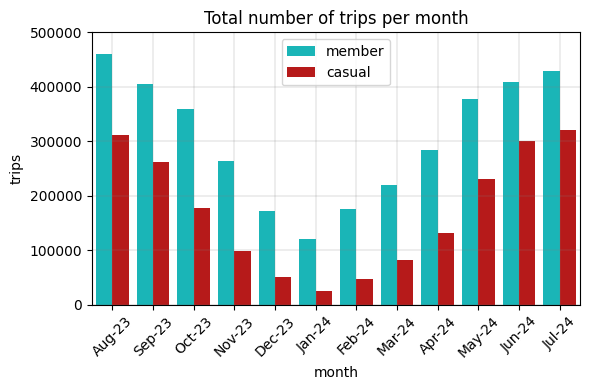

In [32]:
# Set custom colors for `member` and `casual`
palette = {'member': '#00CED1', 'casual': '#D00000'} 

# Creating graphs with matplotlib or seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x="month", y="amount_rides", hue="member_casual", data=df, palette=palette)
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.title("Total number of trips per month")
plt.xlabel("month")
plt.ylabel("trips")
plt.ylim(0, 500000) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper center', fontsize=10) 

# Showing the graph
plt.show()

4. Average trip duration



In [33]:
# Creating a cursor and executing the query
sql = """
SELECT
    member_casual,
    DATE_FORMAT(started_at, '%b-%y') AS month,
    SEC_TO_TIME(AVG(TIMESTAMPDIFF(SECOND, started_at, ended_at))) AS avg_trip_duration
FROM last_year_report
GROUP BY member_casual, month;
"""
cursor = conexion.cursor()
cursor.execute(sql)

# Getting the results and column names
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert the results to a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

# Convert the avg_trip_duration column to seconds and then to minutes
df['avg_trip_duration_sec'] = pd.to_timedelta(df['avg_trip_duration']).dt.total_seconds() / 60  


- Line chart

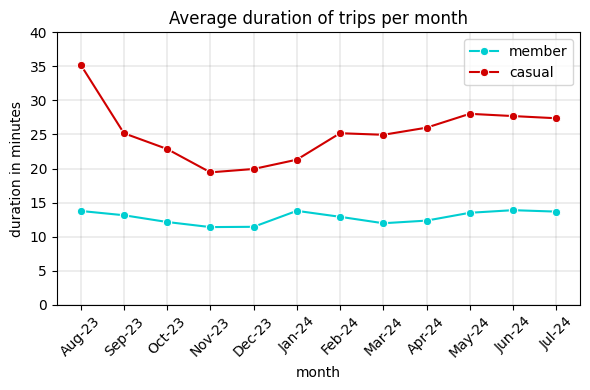

In [32]:
# Set custom colors for `member` and `casual`
palette = {'member': '#00CED1', 'casual': '#D00000'} 

# Creating graphs with matplotlib or seaborn
plt.figure(figsize=(6, 4))
sns.lineplot(x="month", y="avg_trip_duration_sec", hue="member_casual", data=df, marker="o", palette=palette)
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.title("Average duration of trips per month")
plt.xlabel("month")
plt.ylabel("duration in minutes")
plt.ylim(0, 40) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right', fontsize=10) 

# Showing the graph
plt.show()

5. Total number of trips per day of the week

In [34]:
# Creating a cursor and executing the query
sql = """
SELECT 
    member_casual,
    DAYOFWEEK(started_at) AS day_of_week,
    COUNT(ride_id) AS amount_rides
FROM last_year_report
GROUP BY member_casual, day_of_week;
"""
cursor = conexion.cursor()
cursor.execute(sql)

# Getting the results and column names
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert the results to a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

- Bar chart

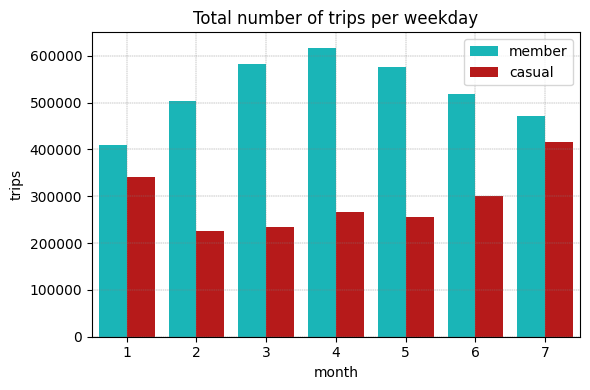

In [35]:
# Set custom colors for `member` and `casual`
palette = {'member': '#00CED1', 'casual': '#D00000'} 

# Creating graphs with matplotlib or seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x="day_of_week", y="amount_rides", hue="member_casual", data=df, palette=palette)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Total number of trips per weekday")
plt.xlabel("month")
plt.ylabel("trips")
plt.ylim(0, 650000) 
plt.tight_layout()
plt.legend(loc='upper right', fontsize=10) 

# Showing the graph
plt.show()

6. Average trips per day of each month

In [36]:
# Creating a cursor and executing the query
sql = """
WITH trips_per_day AS (
    SELECT 
        DATE_FORMAT(started_at, '%b-%y') AS month,
        member_casual,
        DATE(started_at) AS ride_date,
        COUNT(ride_id) AS trips_per_day
    FROM last_year_report
    GROUP BY member_casual, month, ride_date
)
SELECT 
    month,
    member_casual,
    ROUND(AVG(trips_per_day)) AS avg_trips_day
FROM trips_per_day
GROUP BY member_casual, month;
"""
cursor = conexion.cursor()
cursor.execute(sql)

# Getting the results and column names
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert the results to a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

- Bar chart

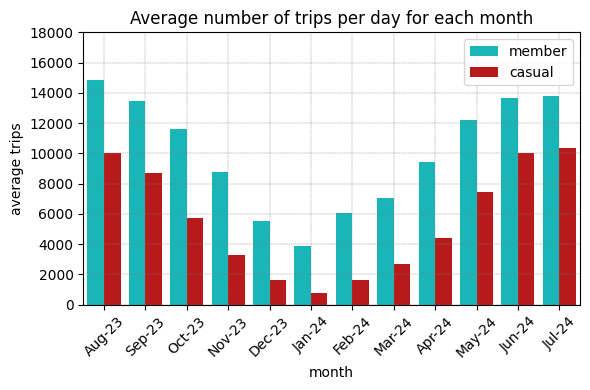

In [37]:
# Set custom colors for `member` and `casual`
palette = {'member': '#00CED1', 'casual': '#D00000'} 

# Creating graphs with matplotlib or seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x="month", y="avg_trips_day", hue="member_casual", data=df, palette=palette)
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Average number of trips per day for each month")
plt.xlabel("month")
plt.ylabel("average trips")
plt.xticks(rotation=45)
plt.ylim(0, 18000) 
plt.tight_layout()
plt.legend(loc='upper right', fontsize=10) 

# Showing the graph
plt.show()

7. Total trips by hour of day: Casual

In [38]:
# Creating a cursor and executing the query
sql = """
SELECT 
	member_casual, 
	HOUR(started_at) AS hour_of_day, 
	COUNT(*) AS total_rides
FROM 
	last_year_report
WHERE member_casual = 'casual'
GROUP BY 
	HOUR(started_at), member_casual
ORDER BY 
	hour_of_day;
"""
cursor = conexion.cursor()
cursor.execute(sql)

# Getting the results and column names
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert the results to a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

- Area chart

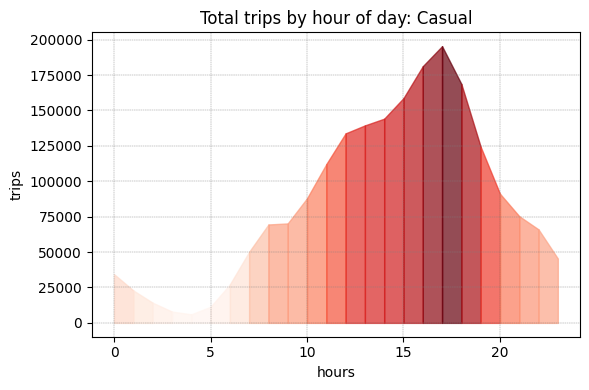

In [39]:
# Creating graphs with matplotlib or seaborn
plt.figure(figsize=(6, 4))

# Normalize the total_rides values ​​to apply the gradient
norm = plt.Normalize(vmin=df['total_rides'].min(), vmax=df['total_rides'].max()) 
cmap = plt.get_cmap('Reds')  

# Graph the area with gradient
for i in range(len(df['hour_of_day']) - 1):
    plt.fill_between(df['hour_of_day'][i:i+2], df['total_rides'][i:i+2], 
                     color=cmap(norm(df['total_rides'][i])), alpha=0.7)
    
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Total trips by hour of day: Casual")
plt.xlabel("hours")
plt.ylabel("trips")
plt.tight_layout() 

# Showing the graph
plt.show()

8. Total trips per hour of day: Members

In [40]:
# Creating a cursor and executing the query
sql = """
SELECT 
	member_casual, 
	HOUR(started_at) AS hour_of_day, 
	COUNT(*) AS total_rides
FROM 
	last_year_report
WHERE member_casual = 'member'
GROUP BY 
	HOUR(started_at), member_casual
ORDER BY 
	hour_of_day;
"""
cursor = conexion.cursor()
cursor.execute(sql)

# Getting the results and column names
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Convert the results to a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

- Area chart

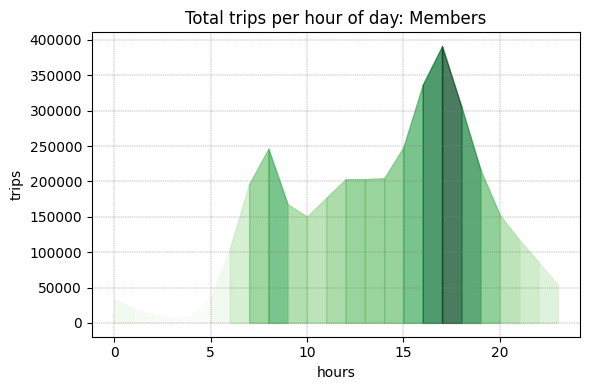

In [41]:
# Creating graphs with matplotlib or seaborn
plt.figure(figsize=(6, 4))

# Normalize the total_rides values ​​to apply the gradient
norm = plt.Normalize(vmin=df['total_rides'].min(), vmax=df['total_rides'].max()) 
cmap = plt.get_cmap('Greens')  

# Graph the area with gradient
for i in range(len(df['hour_of_day']) - 1):
    plt.fill_between(df['hour_of_day'][i:i+2], df['total_rides'][i:i+2], 
                     color=cmap(norm(df['total_rides'][i])), alpha=0.7)
    
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Total trips per hour of day: Members")
plt.xlabel("hours")
plt.ylabel("trips")
plt.tight_layout() 

# Showing the graph
plt.show()

9. Close connection to the database

In [34]:
# Close the connection
cursor.close()
conexion.close()